In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset=pd.read_csv('SOCR-HeightWeight.csv')
dataset.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [6]:
dataset.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [12]:
dataset.shape

(25000, 2)

In [7]:
dataset.dtypes

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [11]:
float_=dataset.dtypes=='float64'
float_columns=list(float_[float_].index)
len(float_columns)

2

<Axes: >

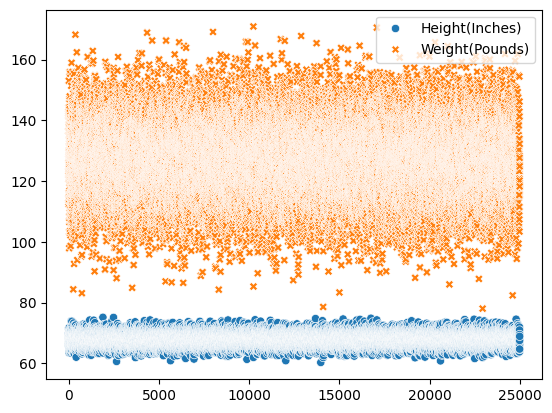

In [13]:
sns.scatterplot(dataset)

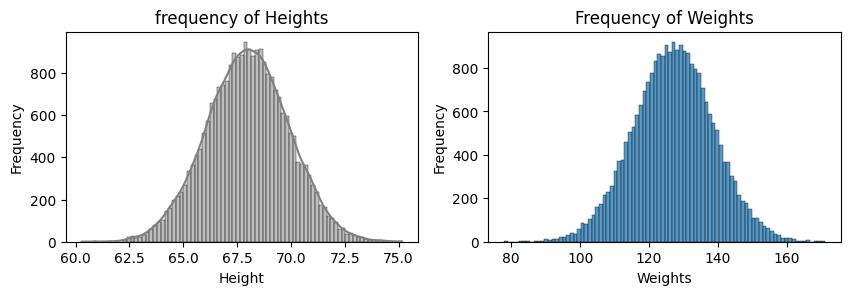

In [19]:


plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.histplot(dataset['Height(Inches)'], kde=True, color='grey')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('frequency of Heights')


plt.subplot(2,2,2)
sns.histplot(dataset['Weight(Pounds)'])
plt.title('Frequency of Weights')
plt.xlabel('Weights')
plt.ylabel('Frequency')
plt.show()

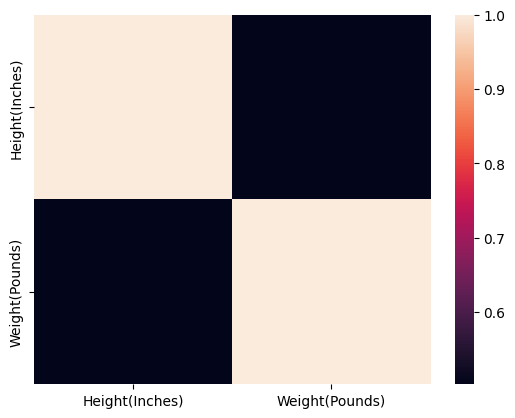

In [25]:
sns.heatmap(dataset.corr())
plt.show()

In [28]:
missing_values=dataset.isnull().sum()
missing_values

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [30]:
#Incase of Null Values

dataset['Height(Inches)'].fillna(dataset['Height(Inches)'].median, inplace=True)
dataset['Weight(Pounds)'].fillna(dataset['Weight(Pounds)'].median, inplace=True)


In [42]:
from sklearn.model_selection import train_test_split

X=dataset['Height(Inches)']
Y=dataset['Weight(Pounds)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
print("X Train:",X_train.shape)
print("Y Train",Y_train.shape)

X Train: (20000,)
Y Train (20000,)


In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
model.fit(X_train, Y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
X_test=pd.DataFrame(X_test)
Y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2=r2_score(Y_test,Y_pred )

print("MSE", mse)
print("R2 Score", r2)

MSE 102.48790963792534
R2 Score 0.26059113512888576


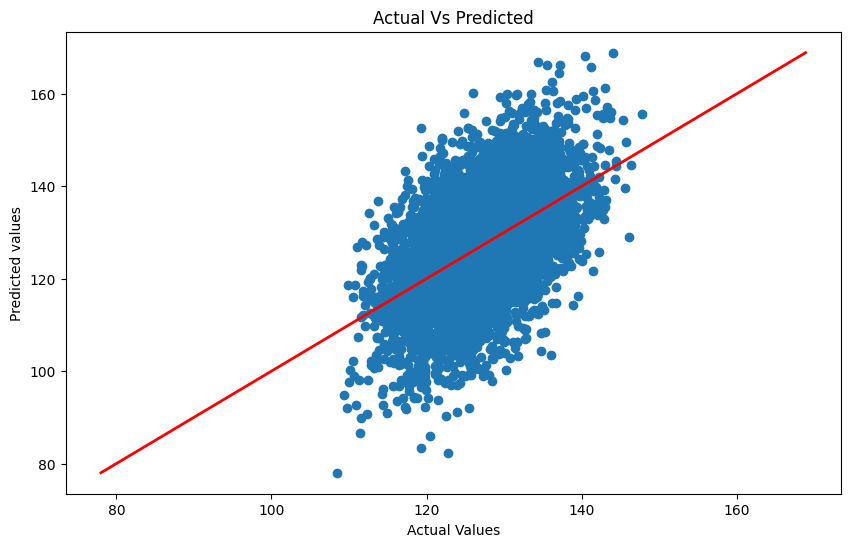

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(Y_pred, Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2 )
plt.title("Actual Vs Predicted")
plt.xlabel('Actual Values')
plt.ylabel("Predicted values")
plt.show()

In [94]:
sample_testing=[[60]]
predictions=model.predict(sample_testing)
print("Prediction: "+str(predictions[0][0])+" Pounds")

Prediction: 102.53783827112322 Pounds


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:

array_of_heights=[10,50,43,12,86,52,22,203]
list_of_heights=  [[height] for height in  array_of_heights]

print(list_of_heights)

preds=model.predict(list_of_heights)
for i in preds:
    print("Predictions: "+str(i[0])+" Pounds")

[[10], [50], [43], [12], [86], [52], [22], [203]]
Predictions: -51.02441219015875 Pounds
Predictions: 71.82538817886685 Pounds
Predictions: 50.326673114287345 Pounds
Predictions: -44.88192217170747 Pounds
Predictions: 182.39020851098985 Pounds
Predictions: 77.96787819731811 Pounds
Predictions: -14.169472079451069 Pounds
Predictions: 541.7258745903897 Pounds


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [91]:
testing_dataset=pd.read_csv('testing.csv')

testing_dataset.rename(columns={'Height':'Height(Inches)'}, inplace=True)

testing_dataset=pd.DataFrame(testing_dataset['Height(Inches)'])

predictions=model.predict(testing_dataset)

for i in predictions:
    print(str(i[0])+" Pounds")




-78.66561727318951 Pounds
-75.59437226396386 Pounds
-72.52312725473823 Pounds
-51.02441219015875 Pounds
-4.95573705177415 Pounds
41.11293808661044 Pounds
102.53783827112322 Pounds
225.38763864014885 Pounds
